In [1]:
import os, sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import MaaSSim

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#!pip install MaaSSim
import MaaSSim.utils
import logging
from dotmap import DotMap
import MaaSSim.simulators
from MaaSSim.data_structures import structures as inData
from MaaSSim.day_to_day import driver_opt_out, S_driver_opt_out
from MaaSSim.day_to_day import traveller_opt_out
from MaaSSim.day_to_day import d2d_kpi_veh
from MaaSSim.day_to_day import d2d_kpi_pax

In [4]:
import osmnx as ox
import networkx as nx
import random
import math
import pandas as pd
import matplotlib.pyplot as plt          
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [71]:
params = MaaSSim.utils.get_config('glance.json')
params.city = "Amsterdam, Netherlands"
params.paths.G = "../../data/graphs/Amsterdam.graphml"
params.paths.skim = "../../data/graphs/Amsterdam.csv"
params.vehicle_fixed_positions = True
params.times.patience = 600 #second
params.dist_threshold = 10000 #meter
params.dist_threshold_min = 1000 #meter

params.d2d.probabilistic = True
params.d2d.heterogeneous = False
params.d2d.ini_exp_income = 52.8 #euro
params.d2d.ini_exp_wt = 10 #minutes
params.d2d.ini_att = 0.5
params.d2d.res_wage_sp = 1
params.d2d.exp_income_sp = 1
params.d2d.exp_utility_eps = 0
params.d2d.veh_omega = 0.10 # degree of learning: 0<omega<1
params.d2d.pax_omega = 0.10 # degree of learning: 0<omega<1
params.d2d.kappa = 1
params.d2d.B_income = 1
params.d2d.fuel_cost = 0.25 #euro/km

params.d2d.B_fare = 1/14.67
params.d2d.B_inveh_time = 1
params.d2d.B_exp_time = 1.5
params.PT_fare = 1 ## euro
params.PT_speed  = 4 # m/s

params.nPM = 1 # number of platforms. platform id starts from 1
params.platforms.base_fare = 1.4 #euro
params.platforms.fare = 1.21 #euro/km
params.platforms.min_fare = 2 # euro
params.platforms.comm_rate = 0

params.d2d.learning_d = 1 #euro/km

params.nP = 2000
params.nV = 50
params.nD = 100
params.simTime = 4
params.d2d.res_wage = params.simTime*13.20 #euro

In [42]:
# sim = MaaSSim.simulators.simulate(params=params, logger_level=logging.WARNING)
#sim = MaaSSim.simulators.simulate(params=params, kpi_veh=d2d_kpi_veh, logger_level=logging.WARNING)
# sim = MaaSSim.simulators.simulate(params=params, kpi_veh=d2d_kpi_veh, f_driver_out=S_driver_opt_out, logger_level=logging.WARNING)
sim = MaaSSim.simulators.simulate(params=params, f_driver_out=S_driver_opt_out,f_trav_out=traveller_opt_out,
                                  kpi_veh=d2d_kpi_veh, kpi_pax=d2d_kpi_pax, logger_level=logging.WARNING)

07-06-22 10:07:42-WARNING-Setting up 4h simulation at 2022-06-07 08:07:12 for 50 vehicles and 2000 passengers in Amsterdam, Netherlands
07-06-22 10:07:56-WARNING-simulation time 8.3 s
07-06-22 10:07:57-WARNING-assertion tests for simulation results - passed
07-06-22 10:08:10-WARNING-simulation time 8.7 s
07-06-22 10:08:11-WARNING-assertion tests for simulation results - passed
07-06-22 10:08:23-WARNING-simulation time 7.9 s
07-06-22 10:08:24-WARNING-assertion tests for simulation results - passed
07-06-22 10:08:37-WARNING-simulation time 8.6 s
07-06-22 10:08:37-WARNING-assertion tests for simulation results - passed
07-06-22 10:08:51-WARNING-simulation time 9.2 s
07-06-22 10:08:52-WARNING-assertion tests for simulation results - passed


<AxesSubplot:>

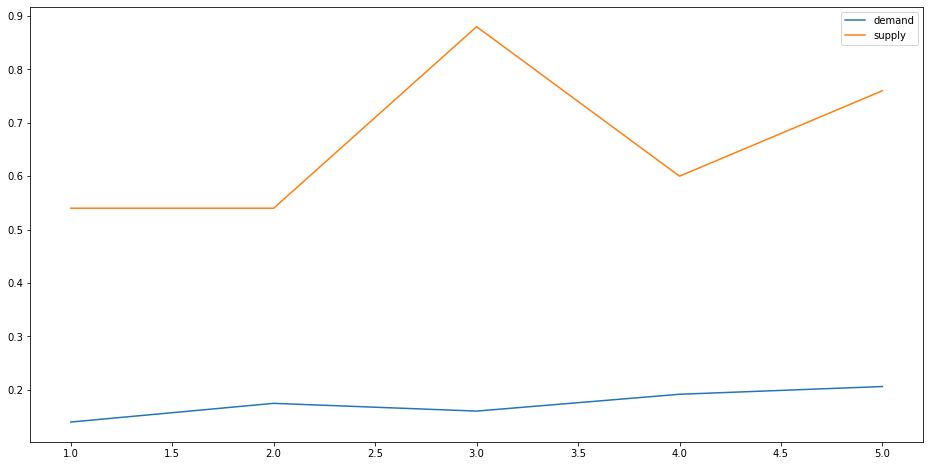

In [43]:
lyp = []
lyd = []

sim = sim_with
for d in range(0,sim.params.nD):
    lyp.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
    lyd.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
lx = [i for i in range(1,len(lyp)+1)]

fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(x=lx, y=lyp, label = 'demand')#, marker='o')
sns.lineplot(x=lx, y=lyd, label = 'supply')#, marker='o')

<AxesSubplot:>

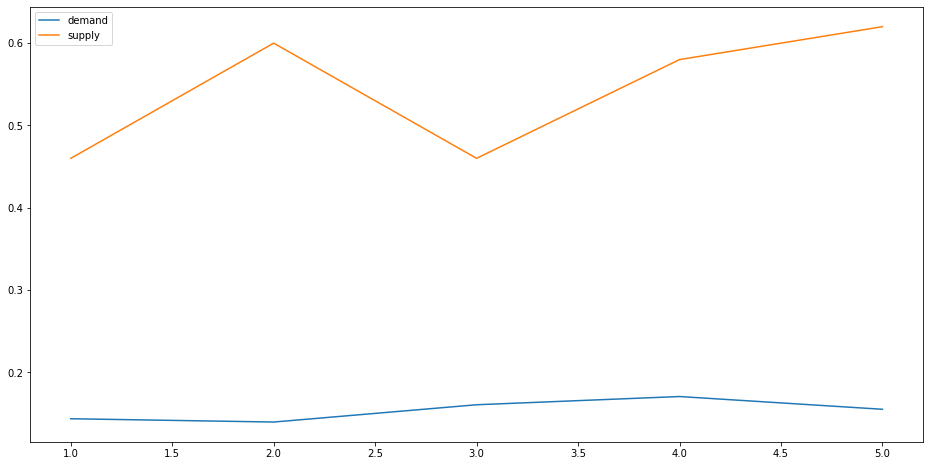

In [34]:
lyp = []
lyd = []

sim = sim_with20
for d in range(0,sim.params.nD):
    lyp.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
    lyd.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
lx = [i for i in range(1,len(lyp)+1)]

fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(x=lx, y=lyp, label = 'demand')#, marker='o')
sns.lineplot(x=lx, y=lyd, label = 'supply')#, marker='o')

In [56]:
from statistics import mean

mean(sim_with.driver_p[150:200])

0.5951879339113844

In [70]:
mean(sim_with20.driver_p[200:250])

0.5631832922935907

In [25]:
d = 0
sim.res[d].veh_exp.mu

veh
1     0
2     0
3     1
4     0
5     1
6     1
7     0
8     0
9     0
10    1
11    0
12    1
13    0
14    1
15    0
16    0
17    1
18    1
19    1
20    1
21    1
22    0
23    1
24    1
25    0
26    0
27    1
28    1
29    1
30    0
31    0
32    0
33    1
34    1
35    1
36    1
37    1
38    1
39    0
40    0
41    1
42    1
43    1
44    0
45    0
46    1
47    1
48    1
49    0
50    1
Name: mu, dtype: int64

In [26]:
sim.res[d].veh_exp.OUT.value_counts()

False    29
True     21
Name: OUT, dtype: int64

In [27]:
sim.res[d].veh_exp.EXPERIENCE_U

veh
1     0.500000
2     0.500000
3     0.548848
4     0.500000
5     0.591615
6     0.575097
7     0.500000
8     0.500000
9     0.500000
10    0.594540
11    0.500000
12    0.573848
13    0.500000
14    0.563245
15    0.500000
16    0.500000
17    0.605569
18    0.545435
19    0.522709
20    0.237431
21    0.520865
22    0.500000
23    0.550622
24    0.531247
25    0.500000
26    0.500000
27    0.558855
28    0.537482
29    0.576520
30    0.500000
31    0.500000
32    0.500000
33    0.599919
34    0.531466
35    0.320071
36    0.562339
37    0.559262
38    0.614681
39    0.500000
40    0.500000
41    0.564371
42    0.519258
43    0.533873
44    0.500000
45    0.500000
46    0.552734
47    0.527909
48    0.501248
49    0.500000
50    0.628170
Name: EXPERIENCE_U, dtype: float64

In [15]:
sim.res[d].veh_exp.pre_ACTUAL_INC

veh
1      52.8
2      52.8
3      52.8
4      52.8
5      52.8
       ... 
96     52.8
97     52.8
98     52.8
99     52.8
100    52.8
Name: pre_ACTUAL_INC, Length: 100, dtype: float64

In [28]:
sim.res[d].veh_exp.ACTUAL_INC

veh
1      0.0000
2      0.0000
3     63.1498
4      0.0000
5     72.3702
6     68.7814
7      0.0000
8      0.0000
9      0.0000
10    73.0101
11     0.0000
12    68.5116
13     0.0000
14    66.2293
15     0.0000
16     0.0000
17    75.4367
18    62.4224
19    57.5995
20    -8.8078
21    57.2093
22     0.0000
23    63.5282
24    59.4079
25     0.0000
26     0.0000
27    65.2881
28    60.7310
29    69.0891
30     0.0000
31     0.0000
32     0.0000
33    74.1908
34    59.4545
35    13.0180
36    66.0348
37    65.3753
38    77.4592
39     0.0000
40     0.0000
41    66.4710
42    56.8693
43    59.9650
44     0.0000
45     0.0000
46    63.9791
47    58.7006
48    53.0635
49     0.0000
50    80.4870
Name: ACTUAL_INC, dtype: float64

In [20]:
df = sim.res[d].veh_exp
df[df['ACTUAL_INC']>30]

,nRIDES,nREJECTED,nDAYS_WORKED,DRIVING_TIME,DRIVING_DIST,REVENUE,COST,COMMISSION,TRIP_FARE,ACTUAL_INC,...,IS_REJECTED_BY_TRAVELLER,ARRIVES_AT_PICKUP,MEETS_TRAVELLER_AT_PICKUP,DEPARTS_FROM_PICKUP,ARRIVES_AT_DROPOFF,CONTINUES_SHIFT,STARTS_REPOSITIONING,REPOSITIONED,DECIDES_NOT_TO_DRIVE,ENDS_SHIFT
veh,,,,,,,,,,,,,,,,,,,,,
1,8.0,0.0,1,8521.0,85.21,60.86416,21.3025,15.21604,76.0802,39.56166,...,0,3159.0,0,240.0,5362.0,0,0,0,0,6218.0
8,8.0,0.0,1,7199.0,71.99,56.04352,17.9975,14.01088,70.0544,38.04602,...,0,2335.0,0,240.0,4864.0,0,0,0,0,7923.0
21,9.0,0.0,1,5316.0,53.16,44.68600,13.2900,11.17150,55.8575,31.39600,...,0,1741.0,0,270.0,3575.0,0,0,0,0,8764.0
27,8.0,0.0,1,6296.0,62.96,53.05240,15.7400,13.26310,66.3155,37.31240,...,0,1741.0,0,240.0,4555.0,0,0,0,0,6712.0
29,8.0,0.0,1,6776.0,67.76,49.21912,16.9400,12.30478,61.5239,32.27912,...,0,2617.0,0,240.0,4159.0,0,0,0,0,6999.0
30,6.0,0.0,1,5488.0,54.88,44.89792,13.7200,11.22448,56.1224,31.17792,...,0,1544.0,0,180.0,3944.0,0,0,0,0,7415.0
34,7.0,0.0,1,5300.0,53.00,44.11096,13.2500,11.02774,55.1387,30.86096,...,0,1553.0,0,210.0,3747.0,0,0,0,0,6893.0
44,7.0,0.0,1,6553.0,65.53,50.30616,16.3825,12.57654,62.8827,33.92366,...,0,2166.0,0,210.0,4387.0,0,0,0,0,7589.0
45,9.0,0.0,1,8425.0,84.25,57.93792,21.0625,14.48448,72.4224,36.87542,...,0,3481.0,0,270.0,4944.0,0,0,0,0,6774.0


In [67]:
sim.res[0].veh_exp

,nRIDES,nREJECTED,nDAYS_WORKED,DRIVING_TIME,DRIVING_DIST,REVENUE,COST,COMMISSION,TRIP_FARE,ACTUAL_INC,...,IS_REJECTED_BY_TRAVELLER,ARRIVES_AT_PICKUP,MEETS_TRAVELLER_AT_PICKUP,DEPARTS_FROM_PICKUP,ARRIVES_AT_DROPOFF,CONTINUES_SHIFT,STARTS_REPOSITIONING,REPOSITIONED,DECIDES_NOT_TO_DRIVE,ENDS_SHIFT
veh,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [160]:
b = 0.1
working_U = b*50
not_working_U = b*40

p = (math.exp(working_U))/(math.exp(working_U) + math.exp(not_working_U))
p

0.7310585786300049

In [162]:
b = 10
working_U = b*0.5
not_working_U = b*0.5

p = (math.exp(working_U))/(math.exp(working_U) + math.exp(not_working_U))
p

0.6506198657744141

In [65]:
from numpy import log as ln

u = 0.9607296994499495
b = 1
a = 1
dif = 1#(52.8-72.8)/52.8

e = 1/(1+math.exp(b*(ln((1/u)-1)+dif)))


b = 10
working_U = b*e
not_working_U = b*0.5

p = (math.exp(working_U))/(math.exp(working_U) + math.exp(not_working_U))
p

0.9820137900379085

In [66]:
print(e)

0.8999999999999999


In [52]:
working_U = 10*0.49
not_working_U = 10*0.5
working_P = (math.exp(working_U))/(math.exp(working_U) + math.exp(not_working_U))
working_P

0.47502081252106004